In [1]:
import collections
import matplotlib.pyplot as plt
from collections import defaultdict
import collections
import numpy as np
from statistics import mean 
import time
from scipy import stats
import networkx as nx
from sklearn import preprocessing

In [2]:
"""Benchmark dataset reader."""
ts = time.time()
from littleballoffur.data_reader import GraphReader

reader = GraphReader('bitcoinalpha')

graph = reader.get_graph()
time.time() - ts

0.3719499111175537

In [3]:
nx.is_weighted(graph)

True

Forest Fire Sampler

In [49]:
ts = time.time()
#Random walk

from littleballoffur.exploration_sampling import ForestFireSampler

sampler = ForestFireSampler(number_of_nodes = 750)

ff_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(ff_graph.nodes))
time.time() - ts

original graph nodes 3783
after sampling graph nodes 750


0.0747520923614502

In [50]:
nx.is_weighted(ff_graph)

False

Non Back Tracking Random Walk Sampler

In [43]:
ts = time.time()
#Random walk

from littleballoffur.exploration_sampling import NonBackTrackingRandomWalkSampler

sampler = NonBackTrackingRandomWalkSampler(number_of_nodes = 750)

nrw_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(nrw_graph.nodes))
time.time() - ts

original graph nodes 3783
after sampling graph nodes 750


0.006083011627197266

In [44]:
nx.is_weighted(nrw_graph)

True

Metropolis Hasting Random Walk Sampler

In [45]:
ts = time.time()
#Random walk

from littleballoffur.exploration_sampling import MetropolisHastingsRandomWalkSampler

sampler = MetropolisHastingsRandomWalkSampler(number_of_nodes = 750)

metropolis_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(metropolis_graph.nodes))
time.time() - ts

original graph nodes 3783
after sampling graph nodes 750


0.011507272720336914

In [46]:
nx.is_weighted(metropolis_graph)

True

Diffusion Sampler

In [39]:
ts = time.time()
#Random walk

from littleballoffur.exploration_sampling import DiffusionSampler

sampler = DiffusionSampler(number_of_nodes = 750)

diffusion_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(diffusion_graph.nodes))
time.time() - ts

original graph nodes 3783
after sampling graph nodes 750


0.017863988876342773

In [40]:
nx.is_weighted(diffusion_graph)

True

Spiky Ball Sampler

In [4]:
ts = time.time()

from littleballoffur.exploration_sampling import SpikyBallSamplerWeighted

sampler = SpikyBallSamplerWeighted(number_of_nodes= 750,mode = "hubball")

spiky_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(spiky_graph.nodes))
time.time() - ts

original graph nodes 3783
after sampling graph nodes 750


1.877547025680542

In [5]:
nx.is_weighted(spiky_graph)

True

# Statistics

In [6]:
ts = time.time()
#Original graph
print('Average Clustering - Original: ',nx.average_clustering(graph))

print('-------------------------------------------------------------------')
#Spiky Ball
print('Average Clustering - Spiky ball: ',nx.average_clustering(spiky_graph))
time.time() - ts


Average Clustering - Original:  0.1766290303590772
-------------------------------------------------------------------
Average Clustering - Spiky ball:  0.3026293754195666


0.3100321292877197

In [7]:
ts = time.time()
#Original graph
print('Triangles Percentage - Original: ',(sum(nx.triangles(graph).values()) / 3)/len(graph.nodes))

print('-------------------------------------------------------------------')
#Spiky Ball
print('Triangles Percentage- Spiky Ball: ',(sum(nx.triangles(spiky_graph).values()) / 3)/len(spiky_graph.nodes))

time.time() - ts



Triangles Percentage - Original:  5.855934443563309
-------------------------------------------------------------------
Triangles Percentage- Spiky Ball:  15.857333333333333


0.33481907844543457

In [8]:
ts = time.time()
#Original graph
print('Size of largest connected component - Original: ',len(max(nx.connected_components(graph))))

print('-------------------------------------------------------------------')
#Spiky Ball
print('Size of largest connected component- Spiky Ball: ',len(max(nx.connected_components(spiky_graph))))


time.time() - ts


Size of largest connected component - Original:  3775
-------------------------------------------------------------------
Size of largest connected component- Spiky Ball:  735


0.006786823272705078

In [9]:
ts = time.time()
#Original graph
print('Degree Assortativity Coefficient - Original: ',nx.degree_assortativity_coefficient(graph))

print('-------------------------------------------------------------------')

#Spiky Ball
print('Degree Assortativity Coefficient - Spiky Ball: ',nx.degree_assortativity_coefficient(spiky_graph))

time.time() - ts



Degree Assortativity Coefficient - Original:  -0.16851576112150454
-------------------------------------------------------------------
Degree Assortativity Coefficient - Spiky Ball:  -0.2736420841298842


0.23311901092529297

# Matching Patterns / Plots

In [10]:
def degree_distributon(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    return deg,cnt

In [11]:
ts = time.time()
#Original 
deg,cnt = degree_distributon(graph)

#Random Walk
deg1,cnt1 = degree_distributon(spiky_graph)

time.time() - ts

0.005202054977416992

Text(0.5, 0, 'Degree')

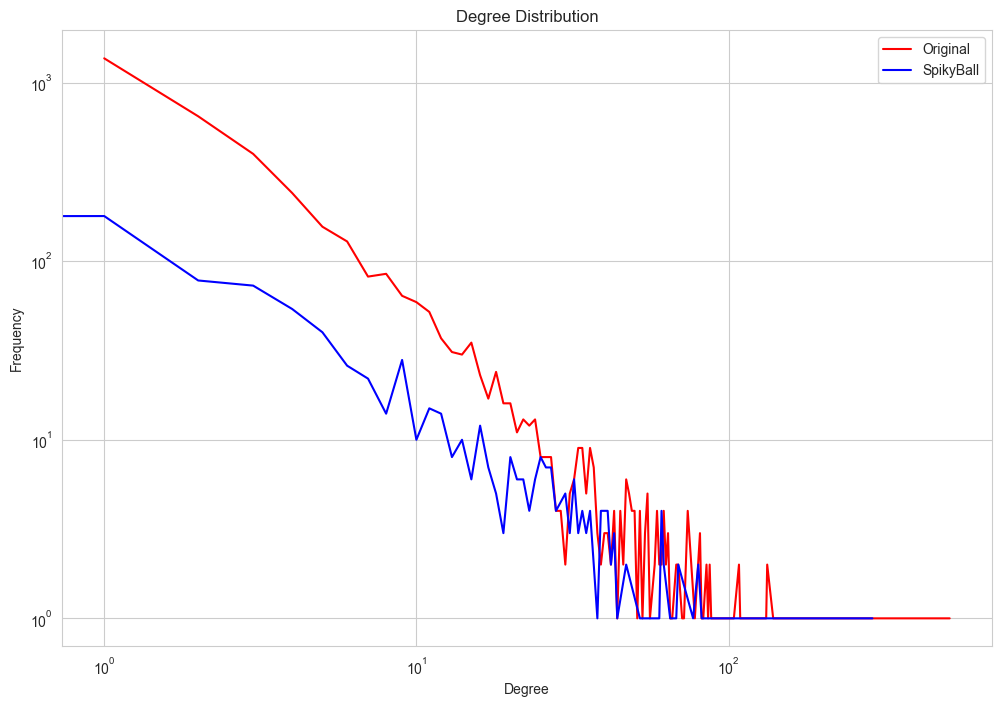

In [12]:
plt.figure(figsize=(12, 8))
plt.loglog(deg, cnt, 'r-', label='original')
plt.loglog(deg1,cnt1, 'b-', label='SpikyBall')

plt.legend(['Original','SpikyBall','FF/SNOW','SP'])
plt.title("Degree Distribution")
plt.ylabel("Frequency")
plt.yscale('log')
# plt.xscale('log')
plt.xlabel("Degree")

In [13]:
# def degree_clustering(G):
#    degree = G.degree()
#    degree_list,degrees,clustering_list = [],[],[]
#    for n,m in degree:
#       degree_list.append(m)
#    degree_list
#    degree_np = np.asarray(sorted(degree_list))
  

#    for k in range(len(np.unique(degree_np))):
#       nodes_degree_k = ([u for u in G.nodes() if G.degree(u) == k])
#       if len(nodes_degree_k) != 0:
#          clustering_coeff = nx.average_clustering(G, nodes_degree_k)
#          degrees.append(k)
#          clustering_list.append(clustering_coeff)
#       nodes_degree_k = []
         
#    return degrees,clustering_list 


def degree_clustering(original, sample):
   degree = sample.degree()
   degree_list,degrees,clustering_list,kstest = [],[],[],[]
   
   for n,m in degree:
      degree_list.append(m)
   degree_list
   degree_np = np.asarray(sorted(degree_list))
  

   for k in range(len(np.unique(degree_np))):
      sample_nodes_degree_k = ([u for u in sample.nodes() if sample.degree(u) == k])
      if len(sample_nodes_degree_k) != 0:
        sample_clustering_coef = nx.clustering(sample, sample_nodes_degree_k)
        original_nodes_degree_k = ([u for u in original.nodes() if original.degree(u) == k])
        original_clustering_coef = nx.clustering(original, original_nodes_degree_k)
        avg_clustering_coeff = nx.average_clustering(sample, sample_nodes_degree_k)

        original_clustering_coef = np.fromiter(original_clustering_coef.values(), dtype=float)
        
        sample_clustering_coef = np.fromiter(sample_clustering_coef.values(), dtype=float)
        
        if len(original_clustering_coef) != 0:
         if len(sample_clustering_coef) != 0:
            ks_test = stats.ks_2samp(preprocessing.scale(original_clustering_coef), preprocessing.scale(sample_clustering_coef))[0]

            kstest.append(ks_test)
        degrees.append(k)
        clustering_list.append(avg_clustering_coeff)
      nodes_degree_k = []
    
   avg_kstest = np.average(kstest)
         
   return degrees,clustering_list,avg_kstest 

In [14]:
ts = time.time()
degrees,clustering_list,avg_kstest = degree_clustering(graph,graph)
degrees1,clustering_list1,avg_kstest1 = degree_clustering(graph,spiky_graph)

time.time() - ts

1.3468029499053955

Text(0.5, 0, 'Node Degree')

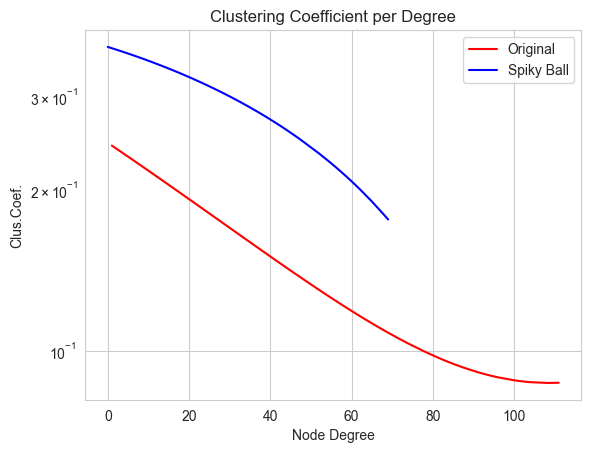

In [15]:
z = np.polyfit(degrees, clustering_list,2)
p = np.poly1d(z)
plt.plot(degrees,p(degrees),"red")

z = np.polyfit(degrees1, clustering_list1,2)
p = np.poly1d(z)
plt.plot(degrees1,p(degrees1),"blue")



plt.legend(['Original','Spiky Ball','FF/SNOW','SP'])
plt.title("Clustering Coefficient per Degree")
plt.ylabel("Clus.Coef.")
# plt.xscale('log')
plt.yscale('log')
plt.xlabel("Node Degree")

In [16]:
def average_degree_neighbor(original, sample):
   degree = sample.degree()
   degree_list,degrees,neighbor_list,kstest = [],[],[],[]
   for n,m in degree:
      degree_list.append(m)
   degree_list
   degree_np = np.asarray(sorted(degree_list))
  

   for k in range(len(np.unique(degree_np))):
      nodes_degree_k = ([u for u in sample.nodes() if sample.degree(u) == k])
      # print(nodes_degree_k)
      if len(nodes_degree_k) != 0:
         sample_aver_neighbor_deg = nx.average_neighbor_degree( sample , nodes = nodes_degree_k)

         original_nodes_degree_k = ([u for u in original.nodes() if original.degree(u) == k])
         original_aver_neighbor_deg = nx.average_neighbor_degree( original , nodes = original_nodes_degree_k)


         original_avg_neighbor_degree = np.fromiter(original_aver_neighbor_deg.values(), dtype=float)
         sample_aver_neighbor_deg = np.fromiter(sample_aver_neighbor_deg.values(), dtype=float)

         if len(original_avg_neighbor_degree) != 0:
            if len(sample_aver_neighbor_deg) != 0:
               ks_test = stats.ks_2samp(preprocessing.scale(original_avg_neighbor_degree), preprocessing.scale(sample_aver_neighbor_deg))[0]
         
               kstest.append(ks_test)

         list_avg = mean(sample_aver_neighbor_deg) 
         degrees.append(k)
         neighbor_list.append(list_avg)
      nodes_degree_k = []
   
   kstest_neighbor_degree = np.average(kstest)
         
   return degrees,neighbor_list,kstest_neighbor_degree

In [17]:
ts = time.time()
degrees,neighbor_list,kstest_neighbor_degree = average_degree_neighbor(graph,graph)
degrees1,neighbor_list1,kstest_neighbor_degree1 = average_degree_neighbor(graph,spiky_graph)
time.time() - ts

1.0656840801239014

Text(0.5, 0, 'Node Degree')

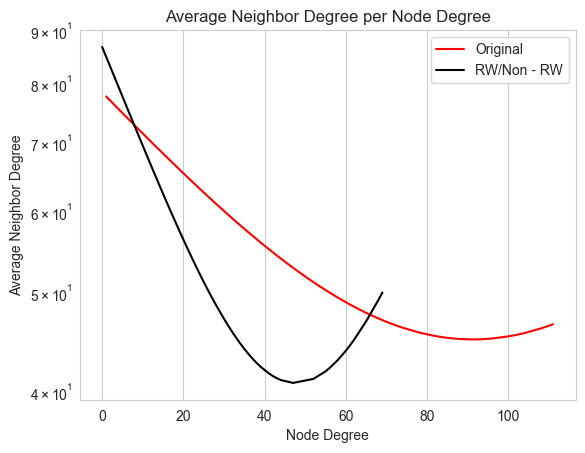

In [18]:
z = np.polyfit(degrees, neighbor_list,2)
p = np.poly1d(z)
plt.plot(degrees,p(degrees),"r")

z = np.polyfit(degrees1, neighbor_list1,2)
p = np.poly1d(z)
plt.plot(degrees1,p(degrees1),"black")

plt.legend(['Original','RW/Non - RW','SP', 'FF/SNOW'])
plt.title("Average Neighbor Degree per Node Degree")
plt.ylabel("Average Neighbor Degree")
# plt.xscale('log')
plt.yscale('log')
plt.xlabel("Node Degree")

# KOLMOGOROV-SMIRNOV TEST

KS-TEST FOR AVERAGE CLUSTERING COEFFICIENT PER NODE DEGREE

In [19]:
print("RW ---> ", avg_kstest1)

RW --->  0.31695372130280874


KS-TEST FOR AVERAGE NEIGHBORHOOD DEGREE PER NODE DEGREE

In [20]:
print("RW ---> ", kstest_neighbor_degree1)

RW --->  0.2916937945560268
